# Your Title Here

**Name(s)**: Nahuel Canavy

**Website Link**: (your website link)

## Code

In [33]:
import pandas as pd
import numpy as np
import os
import plotly.express as px
pd.options.plotting.backend = 'plotly'
from scipy import stats

## Load the data and merge the data

In [109]:
# Remove rows where rating or nutrition information is missing
clean_data = food_recipe_with_ratings.dropna(subset=['rating', 'nutrition'])

# Split the nutrition information into separate columns
nutrition_data = clean_data['nutrition'].str.strip('[]').str.split(',', expand=True)
nutrition_data.columns = ['calories', 'total_fat', 'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrates']

# Convert to float
nutrition_data = nutrition_data.astype(float)
# Merge this back into the cleaned data
clean_data = pd.concat([clean_data, nutrition_data], axis=1)
clean_data.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,rating,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates
0,1 brownies in the world best ever,333281,40,985201,2008-10-27,"['60-minutes-or-less', 'time-to-make', 'course...","[138.4, 10.0, 50.0, 3.0, 3.0, 19.0, 6.0]",10,['heat the oven to 350f and arrange the rack i...,"these are the most; chocolatey, moist, rich, d...","['bittersweet chocolate', 'unsalted butter', '...",9,4.0,138.4,10.0,50.0,3.0,3.0,19.0,6.0
1,1 in canada chocolate chip cookies,453467,45,1848091,2011-04-11,"['60-minutes-or-less', 'time-to-make', 'cuisin...","[595.1, 46.0, 211.0, 22.0, 13.0, 51.0, 26.0]",12,"['pre-heat oven the 350 degrees f', 'in a mixi...",this is the recipe that we use at my school ca...,"['white sugar', 'brown sugar', 'salt', 'margar...",11,5.0,595.1,46.0,211.0,22.0,13.0,51.0,26.0
2,412 broccoli casserole,306168,40,50969,2008-05-30,"['60-minutes-or-less', 'time-to-make', 'course...","[194.8, 20.0, 6.0, 32.0, 22.0, 36.0, 3.0]",6,"['preheat oven to 350 degrees', 'spray a 2 qua...",since there are already 411 recipes for brocco...,"['frozen broccoli cuts', 'cream of chicken sou...",9,5.0,194.8,20.0,6.0,32.0,22.0,36.0,3.0
3,millionaire pound cake,286009,120,461724,2008-02-12,"['time-to-make', 'course', 'cuisine', 'prepara...","[878.3, 63.0, 326.0, 13.0, 20.0, 123.0, 39.0]",7,"['freheat the oven to 300 degrees', 'grease a ...",why a millionaire pound cake? because it's su...,"['butter', 'sugar', 'eggs', 'all-purpose flour...",7,5.0,878.3,63.0,326.0,13.0,20.0,123.0,39.0
4,2000 meatloaf,475785,90,2202916,2012-03-06,"['time-to-make', 'course', 'main-ingredient', ...","[267.0, 30.0, 12.0, 12.0, 29.0, 48.0, 2.0]",17,"['pan fry bacon , and set aside on a paper tow...","ready, set, cook! special edition contest entr...","['meatloaf mixture', 'unsmoked bacon', 'goat c...",13,5.0,267.0,30.0,12.0,12.0,29.0,48.0,2.0


In [18]:
# Load the datasets
food_recipe = pd.read_csv(os.path.join('food_data', 'RAW_recipes.csv'))
food_interaction = pd.read_csv(os.path.join('food_data', 'RAW_interactions.csv'))

# Left merge the recipes and interactions datasets together.
merged_data = pd.merge(food_recipe, food_interaction, how='left', left_on='id', right_on='recipe_id')

# Fill all ratings of 0 with np.nan.
# This is a reasonable step because we can assume that a rating of 0 implies no rating given,
# and replacing these with NaN will prevent these 0 ratings from skewing the average rating calculation.
merged_data['rating'] = merged_data['rating'].replace(0, np.nan)

# Find the average rating per recipe
# Define a custom aggregation function that calculates the mean while excluding NaN values
def mean_without_nan(series):
    if series.dropna().empty:
        return np.nan
    else:
        return np.nanmean(series)

# Calculate the mean without including NaN values
average_rating = merged_data.groupby('id')['rating'].apply(mean_without_nan)
# Add this Series containing the average rating per recipe back to the recipes dataset
# Here we create a new dataframe which is a copy of the original food_recipe dataframe and adds the new 'average_rating' column
food_recipe_with_ratings = food_recipe.copy()
food_recipe_with_ratings = pd.merge(food_recipe_with_ratings, average_rating, how='left', left_on='id', right_on='id')
food_recipe_with_ratings.head()


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,rating
0,1 brownies in the world best ever,333281,40,985201,2008-10-27,"['60-minutes-or-less', 'time-to-make', 'course...","[138.4, 10.0, 50.0, 3.0, 3.0, 19.0, 6.0]",10,['heat the oven to 350f and arrange the rack i...,"these are the most; chocolatey, moist, rich, d...","['bittersweet chocolate', 'unsalted butter', '...",9,4.0
1,1 in canada chocolate chip cookies,453467,45,1848091,2011-04-11,"['60-minutes-or-less', 'time-to-make', 'cuisin...","[595.1, 46.0, 211.0, 22.0, 13.0, 51.0, 26.0]",12,"['pre-heat oven the 350 degrees f', 'in a mixi...",this is the recipe that we use at my school ca...,"['white sugar', 'brown sugar', 'salt', 'margar...",11,5.0
2,412 broccoli casserole,306168,40,50969,2008-05-30,"['60-minutes-or-less', 'time-to-make', 'course...","[194.8, 20.0, 6.0, 32.0, 22.0, 36.0, 3.0]",6,"['preheat oven to 350 degrees', 'spray a 2 qua...",since there are already 411 recipes for brocco...,"['frozen broccoli cuts', 'cream of chicken sou...",9,5.0
3,millionaire pound cake,286009,120,461724,2008-02-12,"['time-to-make', 'course', 'cuisine', 'prepara...","[878.3, 63.0, 326.0, 13.0, 20.0, 123.0, 39.0]",7,"['freheat the oven to 300 degrees', 'grease a ...",why a millionaire pound cake? because it's su...,"['butter', 'sugar', 'eggs', 'all-purpose flour...",7,5.0
4,2000 meatloaf,475785,90,2202916,2012-03-06,"['time-to-make', 'course', 'main-ingredient', ...","[267.0, 30.0, 12.0, 12.0, 29.0, 48.0, 2.0]",17,"['pan fry bacon , and set aside on a paper tow...","ready, set, cook! special edition contest entr...","['meatloaf mixture', 'unsmoked bacon', 'goat c...",13,5.0


In [19]:
# Count the number of NaN values in 'average_rating' column
nan_count = food_recipe_with_ratings['rating'].isna().sum()

# Count the number of non-round ratings in 'average_rating' column
non_round_count = food_recipe_with_ratings['rating'].notna() & (food_recipe_with_ratings['rating'] % 1 != 0)
non_round_count = non_round_count.sum()

# Calculate the total number of values in 'average_rating' column
total_count = food_recipe_with_ratings['rating'].notna().sum()

# Print the results
print("Number of NaN values:", nan_count)
print("Number of non-round ratings:", non_round_count)
print("Total number of values:", total_count)


Number of NaN values: 2609
Number of non-round ratings: 17457
Total number of values: 81173


### Introduction:

We're looking at a dataset from Food.com, a large recipe-sharing site. This dataset has lots of information about recipes and people's reactions to them.

### Main Question:

We want to find out: "Do recipes with more calories get lower ratings?"

This question is important because more people care about healthy eating these days. The answer could help recipe creators, diet-conscious people, and others make better food choices.

### Dataset Info:

Our dataset has many rows, each for a different recipe. The important columns for our question are:

id: A unique number for each recipe.
name: The recipe's name.
nutrition: Shows the recipe's nutritional information, including calories, fat, sugar, sodium, protein, saturated fat, and carbohydrates.
rating: Shows how much users liked the recipe.


### Cleaning and EDA

#### Data Cleaning

In [20]:
# Remove rows where rating or nutrition information is missing
clean_data = food_recipe_with_ratings.dropna(subset=['rating', 'nutrition'])

# Split the nutrition information into separate columns
nutrition_data = clean_data['nutrition'].str.strip('[]').str.split(',', expand=True)
nutrition_data.columns = ['calories', 'total_fat', 'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrates']

# Convert to float
nutrition_data = nutrition_data.astype(float)
# Merge this back into the cleaned data
clean_data = pd.concat([clean_data, nutrition_data], axis=1)
clean_data.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,rating,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates
0,1 brownies in the world best ever,333281,40,985201,2008-10-27,"['60-minutes-or-less', 'time-to-make', 'course...","[138.4, 10.0, 50.0, 3.0, 3.0, 19.0, 6.0]",10,['heat the oven to 350f and arrange the rack i...,"these are the most; chocolatey, moist, rich, d...","['bittersweet chocolate', 'unsalted butter', '...",9,4.0,138.4,10.0,50.0,3.0,3.0,19.0,6.0
1,1 in canada chocolate chip cookies,453467,45,1848091,2011-04-11,"['60-minutes-or-less', 'time-to-make', 'cuisin...","[595.1, 46.0, 211.0, 22.0, 13.0, 51.0, 26.0]",12,"['pre-heat oven the 350 degrees f', 'in a mixi...",this is the recipe that we use at my school ca...,"['white sugar', 'brown sugar', 'salt', 'margar...",11,5.0,595.1,46.0,211.0,22.0,13.0,51.0,26.0
2,412 broccoli casserole,306168,40,50969,2008-05-30,"['60-minutes-or-less', 'time-to-make', 'course...","[194.8, 20.0, 6.0, 32.0, 22.0, 36.0, 3.0]",6,"['preheat oven to 350 degrees', 'spray a 2 qua...",since there are already 411 recipes for brocco...,"['frozen broccoli cuts', 'cream of chicken sou...",9,5.0,194.8,20.0,6.0,32.0,22.0,36.0,3.0
3,millionaire pound cake,286009,120,461724,2008-02-12,"['time-to-make', 'course', 'cuisine', 'prepara...","[878.3, 63.0, 326.0, 13.0, 20.0, 123.0, 39.0]",7,"['freheat the oven to 300 degrees', 'grease a ...",why a millionaire pound cake? because it's su...,"['butter', 'sugar', 'eggs', 'all-purpose flour...",7,5.0,878.3,63.0,326.0,13.0,20.0,123.0,39.0
4,2000 meatloaf,475785,90,2202916,2012-03-06,"['time-to-make', 'course', 'main-ingredient', ...","[267.0, 30.0, 12.0, 12.0, 29.0, 48.0, 2.0]",17,"['pan fry bacon , and set aside on a paper tow...","ready, set, cook! special edition contest entr...","['meatloaf mixture', 'unsmoked bacon', 'goat c...",13,5.0,267.0,30.0,12.0,12.0,29.0,48.0,2.0


#### Univariate Analysis

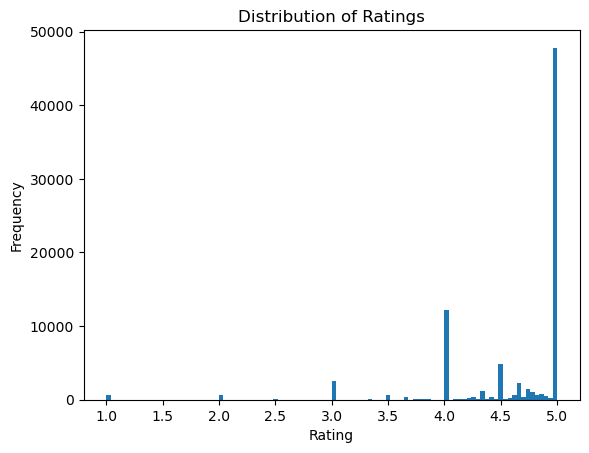

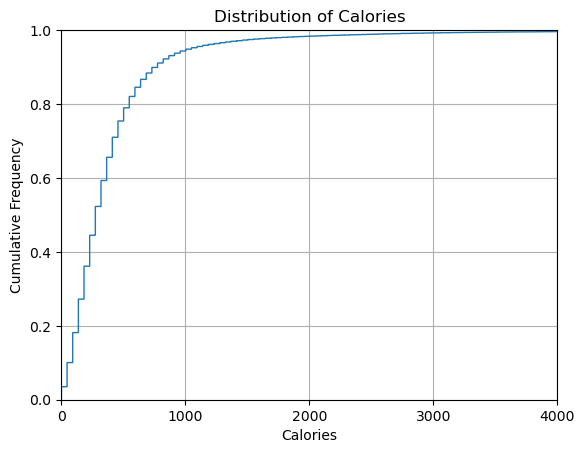

In [21]:
import matplotlib.pyplot as plt

# Plot the distribution of ratings
plt.hist(clean_data['rating'], bins=100)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of calories
calories = clean_data['calories']
bins = 1000
plt.hist(calories, bins=bins, cumulative=True, histtype='step', density=True)

# Max Calories is 45 609, however, if we plot it, we see nothing else...
max_calories=4000
plt.xlim(0, max_calories)
plt.ylim(0, 1)
plt.title('Distribution of Calories')
plt.xlabel('Calories')
plt.ylabel('Cumulative Frequency')


xticks = np.linspace(0, max_calories, num=5)  # Set the number of subdivisions here

plt.xticks(xticks)
plt.grid(True)
plt.show()

So, in the first plot about rating, we can see that a majority of recipes have great ratings, over 4 stars. And is the second plot, we can see the distribution of calories for the recipies. We can see that a lot of recipies are under 2000 calories. 

#### Bivariate Analysis

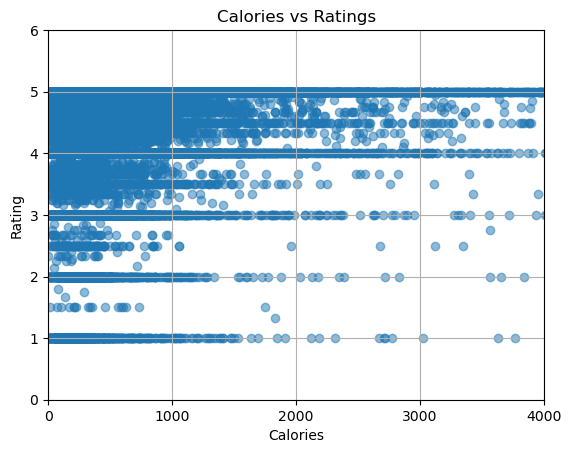

In [22]:
calories = clean_data['calories']
rating = clean_data['rating']

plt.scatter(calories, rating, alpha=0.5)
plt.title('Calories vs Ratings')
plt.xlabel('Calories')
plt.ylabel('Rating')

xticks = np.linspace(0, max_calories, num=5)  # Set the number of subdivisions here

plt.xticks(xticks)
plt.xlim(0, max_calories)
plt.ylim(0, max(rating) + 1)

plt.grid(True)
plt.show()

We can see maybe see a tendance here, that the majority of recipies that got good ratings are under 2000 calories. However, we must not forget the fact that there are a lot more recipies under 2000 calories so it biased the view of the plot. 

#### Interesting Aggregates

In [23]:
# Create a column for calorie level
clean_data['calorie_level'] = pd.cut(clean_data['calories'], bins=[0, 500, 1000, 1500, 2000, float('inf')], labels=['0-500', '500-1000', '1000-1500', '1500-2000', '2000+'])

# Compute the average rating for each calorie level
average_rating_by_calorie_level = clean_data.groupby('calorie_level')['rating'].mean()
print(average_rating_by_calorie_level)

calorie_level
0-500        4.626207
500-1000     4.624574
1000-1500    4.612848
1500-2000    4.614019
2000+        4.628488
Name: rating, dtype: float64


This aggregate is really intersting. Indeed, we can see that the average rating is almost the same for every calorie level. So it would appear that the calorie level isn't influencing the recipe rating. 

### Assessment of Missingness

#### NMAR Analysis

Let's find which columns is missing some values : 

In [24]:
missing_values = food_recipe_with_ratings.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0].index.tolist()
print(missing_values)

name                 1
id                   0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps              0
steps                0
description         70
ingredients          0
n_ingredients        0
rating            2609
dtype: int64


When we can that the rating columns is the one that got the most missing element. For the two oters columns, description and name, it's really only a few so we're going to ignore that and focus on the rating column. 

It is possible to consider the "rating" column as potentially being Not Missing At Random (NMAR).Indeed, because of the quantity of missing values that is really big, it's 2609 for a total numbers of values of 81173 making it more than 3% of all the values. This suggests that the missingness is not random. Moreover, we must recall that it's a mean of all the users ratings for a recipe, so it means that all the users didn't rate the recipe making it even more NMAR. 

Here are some additional data that could help explain the missingness and potentially make it MAR:

        1. User behavior: Collecting data on user engagement and their propensity to leave ratings could be insightful. By analyzing whether users who engage more with the platform or have a history of leaving ratings are more likely to provide ratings, we can assess if the missingness in the "rating" column is related to user behavior. This information could help determine if the missingness is NMAR or MAR.

        2. Recipe attributes: Gathering data on recipe attributes such as difficulty level, cuisine type, or ingredients might provide insights into why certain recipes have missing ratings. Analyzing whether specific types of recipes or certain attributes are associated with missing ratings could help determine if the missingness is NMAR or MAR.

        3. Time-related factors: Examining the submission date or age of the recipes could provide valuable information. If missing ratings are more likely for older recipes or recipes submitted during a specific time period, it could indicate a relationship between missingness and time. This analysis would contribute to understanding whether the missingness is NMAR or MAR.

#### Missingness Dependency

Let's examine two columns: 'n_steps' and 'n_ingredients'. We hypothesize that recipes with more steps or more ingredients may be more likely to have a rating, as they might be more elaborate and thus more likely to be rated.

Let's first start to plot the distribution of n_steps and n_ingredients when ratings are missings and not missings :  

Some code from previous labs to help us plot the different distribution :

In [25]:
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
def create_kde_plotly(df, group_col, group1, group2, vals_col, title=''):
    fig = ff.create_distplot(
        hist_data=[df.loc[df[group_col] == group1, vals_col], df.loc[df[group_col] == group2, vals_col]],
        group_labels=[group1, group2],
        show_rug=False, show_hist=False,
        colors=['#ef553b', '#636efb'],
    )
    return fig.update_layout(title=title)

from scipy.stats import ks_2samp

In [32]:

# We'll work on a copy of the dataset
df = food_recipe_with_ratings.copy()

df['rating_missing'] = df['rating'].isna()
create_kde_plotly(df[['rating_missing', 'n_steps']], 'rating_missing', True, False, 'n_steps',
                       "n_steps by Missingness of Ratingg")

create_kde_plotly(df[['rating_missing', 'n_ingredients']], 'rating_missing', True, False, 'n_ingredients',
                       "n_ingredients by Missingness of Ratingg")

So, we can see our distributions have kind of similar shape and mean. So we're going to run our permutation test using the K-S statistic.

In [35]:
df['rating_is_missing'] = df['rating'].isnull()

def ks_test(df, column):
    with_rating = df.loc[~df['rating_is_missing'], column]
    without_rating = df.loc[df['rating_is_missing'], column]
    return stats.ks_2samp(with_rating, without_rating)

# Columns to test
columns = ['n_steps', 'n_ingredients']

# Perform KS tests
for col in columns:
    stat, p_value = ks_test(df, col)
    print(f"KS test for '{col}': statistic={stat}, p-value={p_value}")

KS test for 'n_steps': statistic=0.07599870558344557, p-value=3.813369074131651e-13
KS test for 'n_ingredients': statistic=0.023797773652822762, p-value=0.112321477466234


Here is how we can interpret our result : 

##### n_steps :
The p-value is extremely small (far less than 0.05). This suggests that we can reject the null hypothesis that the distributions of 'n_steps' are the same for recipes with and without a rating. In other words, the missingness in the 'rating' column is dependent on 'n_steps'. There's a significant difference in the number of steps in recipes with and without ratings.

##### n_ingredients :
The p-value is 0.112, which is greater than 0.05. This suggests that we cannot reject the null hypothesis. In this case, the missingness in the 'rating' column does not seem to be dependent on the 'n_ingredients' column. There isn't a significant difference in the number of ingredients in recipes with and without ratings.

Based on this analysis, it seems like the complexity of the recipe, as measured by the number of steps, might influence whether a recipe has a rating. However, the number of ingredients does not seem to have the same effect.

### Hypothesis Testing

The question we choose at the beginning was : 
### Do recipes with more calories get lower ratings?

Therefore, we can state this pair of hypotheses : 

Null Hypothesis (H0): The number of calories in a recipe does not influence the rating. This implies that there is no correlation between the number of calories in a recipe and its rating.

Alternative Hypothesis (H1): Recipes with more calories receive lower ratings. This implies that there is a negative correlation between the number of calories in a recipe and its rating.

Test Statistic: We chose the correlation coefficient as our test statistic because we are interested in the relationship between two numerical variables: 'calories' and 'rating'. The correlation coefficient quantifies the strength and direction of this relationship, making it an appropriate choice for our test statistic.

Significance Level: We chose a significance level of 0.05 because this is the standard choice for significance level in many statistical tests. 

In [37]:
#Make a copy of the dataframe
df_hypothesis_test = clean_data.copy()
# Calculate observed correlation
obs_corr = df_hypothesis_test['calories'].corr(df_hypothesis_test['rating'])

# Initialize permutation test
num_permutations = 1000
perm_corrs = []
for _ in range(num_permutations):
    # Permute the rating column
    shuffled_rating = df_hypothesis_test['rating'].sample(frac=1, replace=False).reset_index(drop=True)
    
    # Compute correlation for permuted data
    perm_corr = df_hypothesis_test['calories'].corr(shuffled_rating)
    perm_corrs.append(perm_corr)

# Calculate p-value
p_value = np.mean(np.array(perm_corrs) < obs_corr)

print(f"Observed correlation: {obs_corr}")
print(f"P-value: {p_value}")

Observed correlation: -0.0013305173991796462
P-value: 0.339


Let's analyse our result :

The observed correlation is approximately -0.0013, which is very close to zero. This suggests that there is almost no linear relationship between the number of calories in a recipe and its rating.

The p-value is 0.339, which is greater than the commonly used significance level of 0.05. This means that we do not reject the null hypothesis. Therefore, based on this test, we conclude that there's no statistical evidence to suggest that recipes with more calories receive lower ratings.

I'm not really suprise since it confirm our intuition from the previous Bivariate Analysis.